In [ ]:
#1440 indicators, add full name in column, dunn index

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [15]:
#pd.set_option('display.max_columns',None)
df=pd.read_csv("C:/Users/hp1/Documents/minor/WDIEXCEL2.csv")

#print(df.shape)

#get unique indicator values
#indi_unique=len(list(df.Indicator_Name.unique()))
#print(indi_unique)

#get unique indicator names
#country_unique=len(list(df.Country_Name.unique()))
#print(country_unique)

#frequency of each unique indicator
#print(df['Indicator_Name'].value_counts())
df.head()

,Country_Name,Country Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [3]:
#check for rows which have null values for all years 
#df1=df[df.loc[:,'1960':'2020'].isnull().all(axis=1)]

#get column wise sum of null values
#print(df.isnull().sum().sort_values(ascending=False))

#remove those rows
#df.drop(list(df1.index),inplace=True)
#print(df.shape)
#df.to_csv('C:/Users/hp1/Documents/minor/WDIEXCEL2.csv')

In [17]:
#return rows where a column is not nan

df2=df.where(df['2020'].notna())
df2.dropna(how='all',inplace=True)
df2.to_csv('C:/Users/hp1/Documents/minor/2020notnull.csv')

In [ ]:
#stacked bar graph

df1=df.where((df['Indicator_Code']=='SL.TLF.0714.WK.ZS') | (df['Indicator_Code']=='SL.TLF.0714.SW.ZS'))
df1.dropna(how='all',inplace=True)
print(df1.shape)
print(df1.head(10))
df1.to_csv('C:/Users/hp1/Documents/minor/education1.csv')

In [21]:
df_new=df.loc[0:1439,'Indicator_Name'] #since number of unique indicators is 1440

stop_words = set(stopwords.words('english'))
for i in range(0,df_new.size):
    df_new.loc[i]=re.sub('\(.*?\)',"",df_new.loc[i])        #remove content within brackets
    df_new.loc[i] = re.sub(r'[^\w\s]',"", df_new.loc[i])    #remove punctuations
    df_new.loc[i]= re.sub('\d',"",df_new.loc[i])           #remove numbers
    word_tokens = word_tokenize(df_new.loc[i])
    df_new.loc[i]=" ".join(filter(lambda x: x not in stop_words , word_tokens))   #remove stop words

In [22]:
#apply tf-idf vectorization

#v=CountVectorizer() 
v=TfidfVectorizer()
v1=v.fit_transform(df_new)
print(v.get_feature_names())
print(v.vocabulary_)
arr=v1.toarray()

['ability', 'academic', 'access', 'account', 'accountability', 'acquisition', 'added', 'adjusted', 'administration', 'adolescent', 'adolescents', 'adult', 'adults', 'africa', 'age', 'agencies', 'ages', 'agestandardized', 'agglomerations', 'agricultural', 'agriculture', 'aid', 'air', 'alcohol', 'allocation', 'alternative', 'ambient', 'america', 'among', 'anemia', 'annual', 'antiretroviral', 'applications', 'aquaculture', 'arab', 'arable', 'area', 'areas', 'ari', 'armed', 'arms', 'arranging', 'arrivals', 'articles', 'asia', 'assessment', 'assets', 'assistance', 'associated', 'asylum', 'atlas', 'attended', 'attributed', 'australia', 'austria', 'automated', 'available', 'average', 'babies', 'balance', 'bank', 'banks', 'basic', 'battlerelated', 'beds', 'belgium', 'bilateral', 'bird', 'birth', 'births', 'border', 'borrowers', 'borrowing', 'branches', 'breastfeeding', 'bribery', 'broad', 'broadband', 'budgetary', 'build', 'building', 'buildings', 'burden', 'bureau', 'business', 'businesses', 

In [24]:
df3= pd.read_csv("C:/Users/hp1/Documents/minor/WDIEXCEL2.csv")
df_orig=df3.loc[0:1439,'Indicator_Name']
df_orig.head()

In [26]:
#apply k-means

Kmean = KMeans(n_clusters=13,random_state=0)
cluster=Kmean.fit_predict(arr)
df2=pd.Series(list(cluster))
df_orig=pd.concat([df_orig,df2],axis=1)
df_orig.head()
df_orig.rename(columns={0:'Cluster'},inplace=True)
df_orig.to_csv("C:/Users/hp1/Documents/minor/withcluster.csv")
#print(Kmean.cluster_centers_)
#print(Kmean.labels_)

#df1.head()
#df1[df1.Cluster==1]['Indicator_Name']

In [35]:
df_orig.sort_values('Cluster',inplace=True)
df_orig.head(10)

,Indicator_Name,Cluster
943,ARI treatment (% of children under 5 taken to ...,0
371,"International tourism, receipts (current US$)",0
372,"International tourism, receipts for passenger ...",0
1214,"International tourism, receipts for passenger ...",0
373,"International tourism, receipts for travel ite...",0
1215,"International tourism, receipts for travel ite...",0
391,Labor tax and contributions (% of commercial p...,0
1233,Labor tax and contributions (% of commercial p...,0
392,Land area (sq. km),0
1234,Land area (sq. km),0


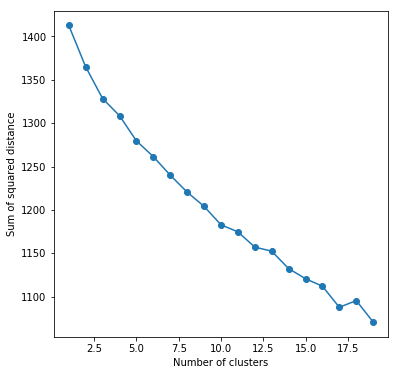

In [28]:
#implement elbow method

sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(arr)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');

In [ ]:
#calc dunn index

df_cluster= pd.read_csv("C:/Users/hp1/Documents/minor/withcluster.csv")
# for i in range(0,size):
#     dist=

In [7]:
#map
df3=df.where((df['Indicator_Code']=='SM.POP.REFG'))
df3.dropna(how='all',inplace=True)
print(df3.shape)
#print(df3.head(10))
#df3.to_csv('C:/Users/hp1/Documents/minor/refugee.csv')

(116, 65)


In [29]:
# df_refugee=pd.read_csv("C:/Users/hp1/Documents/minor/refugee.csv")
# print(df_refugee.isnull().sum().sort_values(ascending=False))